In [40]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

from util.vehiclesModeler import *

In [41]:
OLD_PATH = "./data/oldData/"
PROC_PATH = "./data/processedData/"

In [4]:
df_cars = pd.read_csv(f"{OLD_PATH}/vehicles.csv")
df_cars.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [4]:
df_cars.tail()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600
426879,7301591129,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,...,NaN,coupe,NaN,https://images.craigslist.org/00Y0Y_lEUocjyRxa...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:07-0600


In [5]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [6]:
df_cars.describe(include="all")

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
count,4.268800e+05,426880,426880,426880,4.268800e+05,425675.000000,409234,421603,252776,249202,...,120519,334022,296677,426812,426810,0.0,426880,420331.000000,420331.000000,426812
unique,NaN,426880,404,413,NaN,NaN,42,29667,6,8,...,4,13,12,241899,360911,NaN,51,NaN,NaN,381536
top,NaN,https://prescott.craigslist.org/cto/d/prescott...,columbus,https://spokane.craigslist.org,NaN,NaN,ford,f-150,good,6 cylinders,...,full-size,sedan,white,https://images.craigslist.org/00N0N_1xMPvfxRAI...,35 VEHICLES PRICED UNDER $3000!!! BIG TIME! T...,NaN,ca,NaN,NaN,2021-04-23T22:13:05-0400
freq,NaN,1,3608,2988,NaN,NaN,70985,8009,121456,94169,...,63465,87056,79285,7357,231,NaN,50614,NaN,NaN,12
mean,7.311487e+09,NaN,NaN,NaN,7.519903e+04,2011.235191,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.493940,-94.748599,NaN
std,4.473170e+06,NaN,NaN,NaN,1.218228e+07,9.452120,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.841533,18.365462,NaN
min,7.207408e+09,NaN,NaN,NaN,0.000000e+00,1900.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-84.122245,-159.827728,NaN
25%,7.308143e+09,NaN,NaN,NaN,5.900000e+03,2008.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.601900,-111.939847,NaN
50%,7.312621e+09,NaN,NaN,NaN,1.395000e+04,2013.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.150100,-88.432600,NaN
75%,7.315254e+09,NaN,NaN,NaN,2.648575e+04,2017.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.398900,-80.832039,NaN


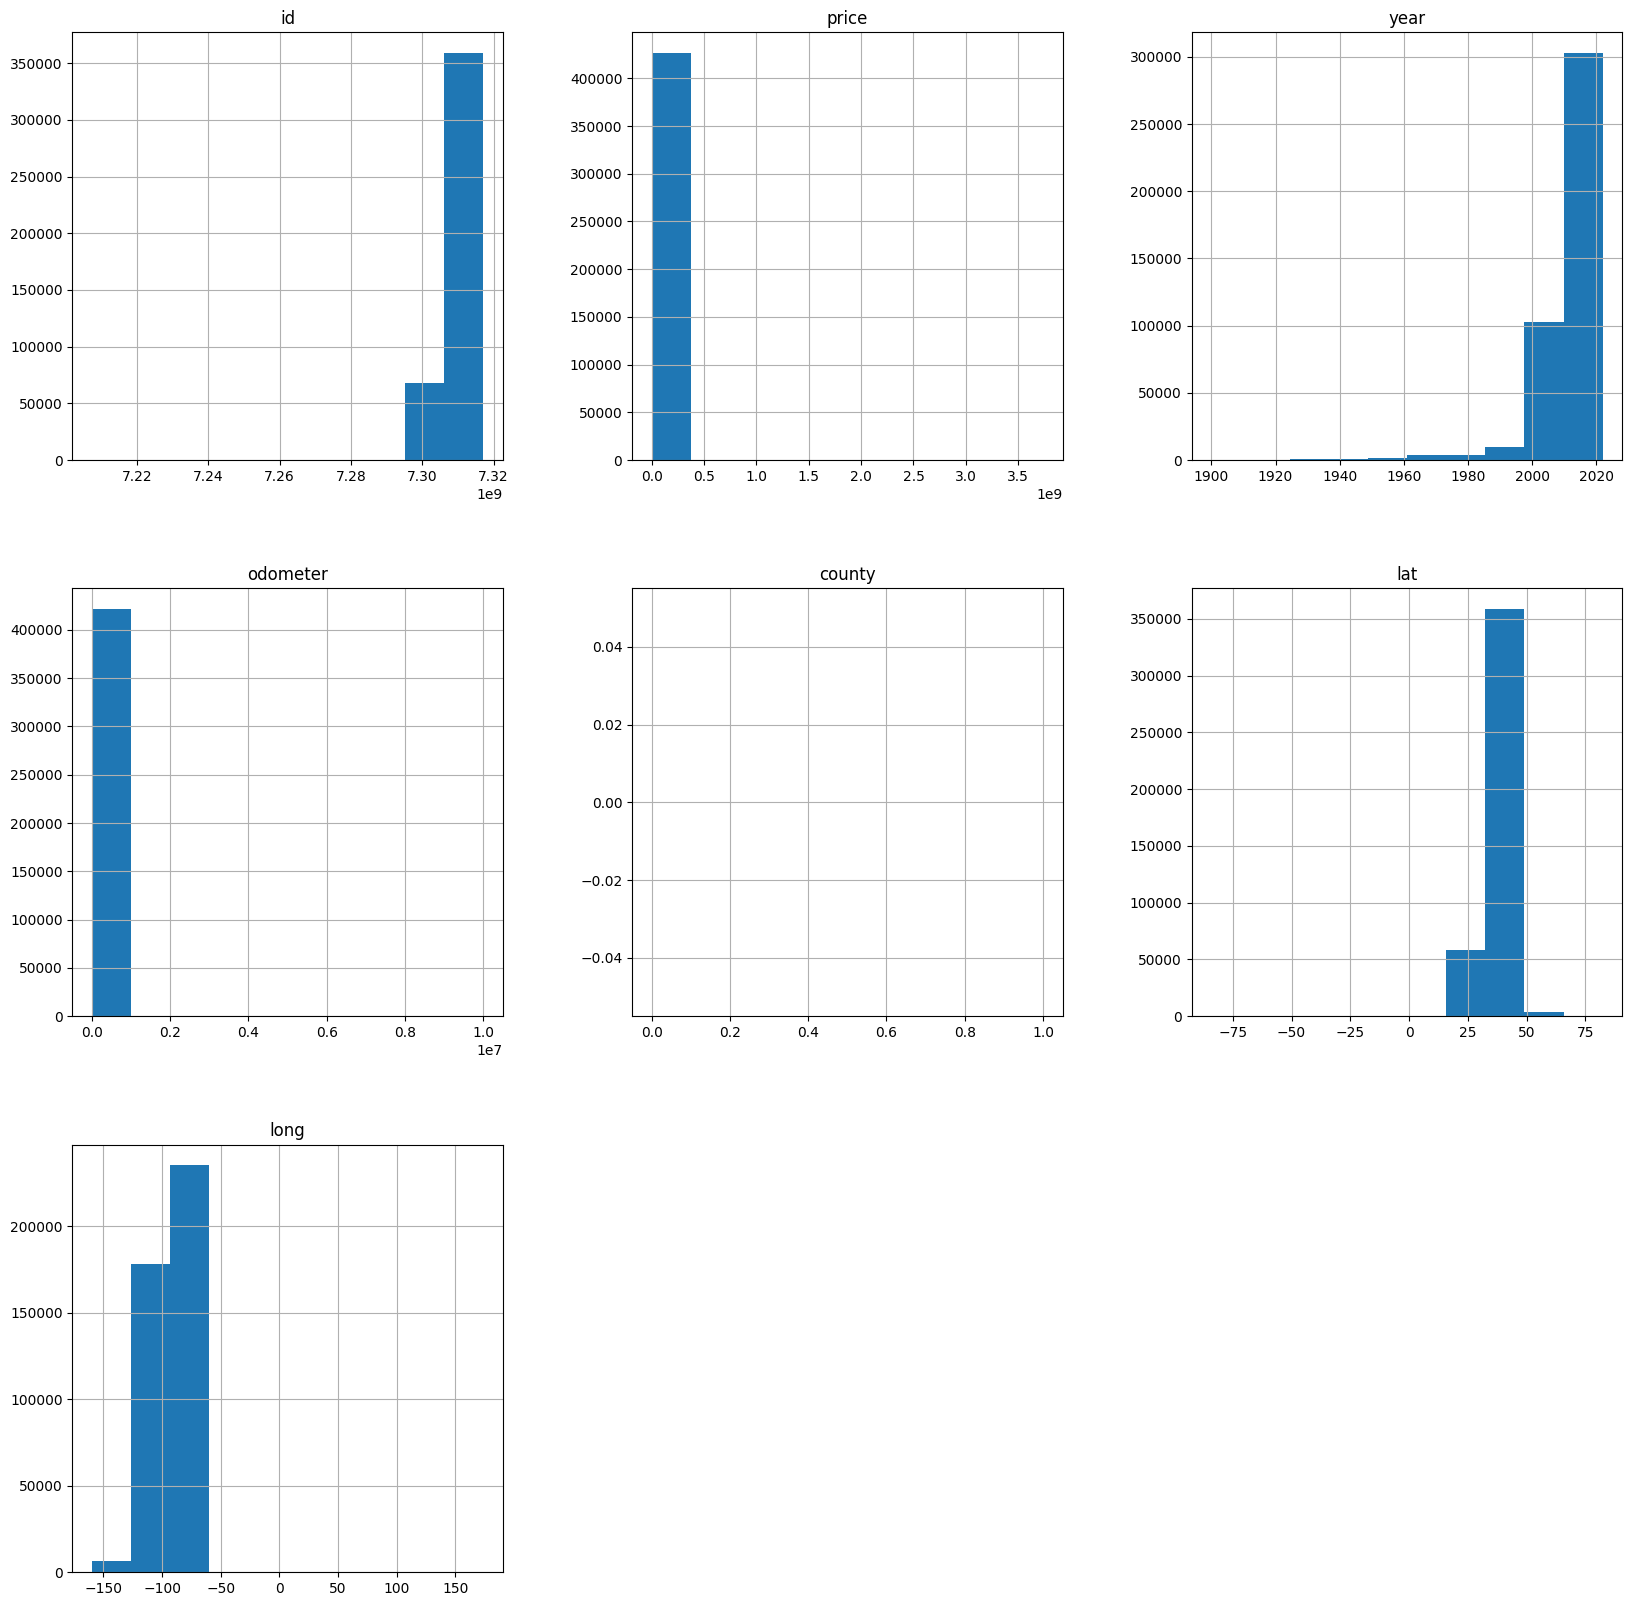

In [7]:
df_cars.hist(figsize=(20,20));

We can see that county as only *NULL* elements, therefore it will be removed

In [5]:
df_cars.drop(columns=["county"], inplace=True)

In [6]:
df_cars[df_cars.duplicated()].shape

(0, 25)

No duplicate rows

In [10]:
df_cars.image_url

0                                                       NaN
1                                                       NaN
2                                                       NaN
3                                                       NaN
4                                                       NaN
                                ...                        
426875    https://images.craigslist.org/00o0o_iiraFnHg8q...
426876    https://images.craigslist.org/00x0x_15sbgnxCIS...
426877    https://images.craigslist.org/00L0L_farM7bxnxR...
426878    https://images.craigslist.org/00z0z_bKnIVGLkDT...
426879    https://images.craigslist.org/00Y0Y_lEUocjyRxa...
Name: image_url, Length: 426880, dtype: object

*url* column is a link to the website where the sale was taking place. <br> 
For what we have tried, the links takes us to non-existing sites, since the car as already been sold. <br>
The *image_url* links to the correspondent images, which do not exist to.<br>
Therefore we will take them out

In [7]:
df_cars.drop(columns=["url", "image_url"], inplace=True)

In [8]:
df_cars.posting_date = pd.to_datetime(df_cars.posting_date)

In [13]:
df_cars.posting_date.head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: posting_date, dtype: object

We can see that we have some sales do not have an associated dates. <br>
we will remove those rows, since we need that information for our analysis, later on

In [9]:
df_cars = df_cars[~df_cars.posting_date.isna()]

In [10]:
df_cars.isna().sum()[df_cars.isna().sum()>0]

year              1137
manufacturer     17578
model             5209
condition       174036
cylinders       177610
fuel              2945
odometer          4332
title_status      8174
transmission      2488
VIN             160974
drive           130499
size            306293
type             92790
paint_color     130135
description          2
lat               6481
long              6481
dtype: int64

In [16]:
df_cars.isna().sum()[df_cars.isna().sum()>0] / len(df_cars)

year            0.002664
manufacturer    0.041184
model           0.012204
condition       0.407758
cylinders       0.416132
fuel            0.006900
odometer        0.010150
title_status    0.019151
transmission    0.005829
VIN             0.377154
drive           0.305753
size            0.717630
type            0.217403
paint_color     0.304900
description     0.000005
lat             0.015185
long            0.015185
dtype: float64

size is missing quite a lot

In [11]:
df_cars["size"].value_counts()

full-size      63465
mid-size       34476
compact        19384
sub-compact     3194
Name: size, dtype: int64

we will drop this column, as it does not match other sources, and there is a lot of information missing

In [12]:
df_cars.drop(columns=["size"], inplace=True)

In [13]:
df_cars = df_cars[~df_cars.manufacturer.isna()]
df_cars = df_cars[~df_cars.model.isna()]

<Axes: xlabel='Regions', ylabel='Counts'>

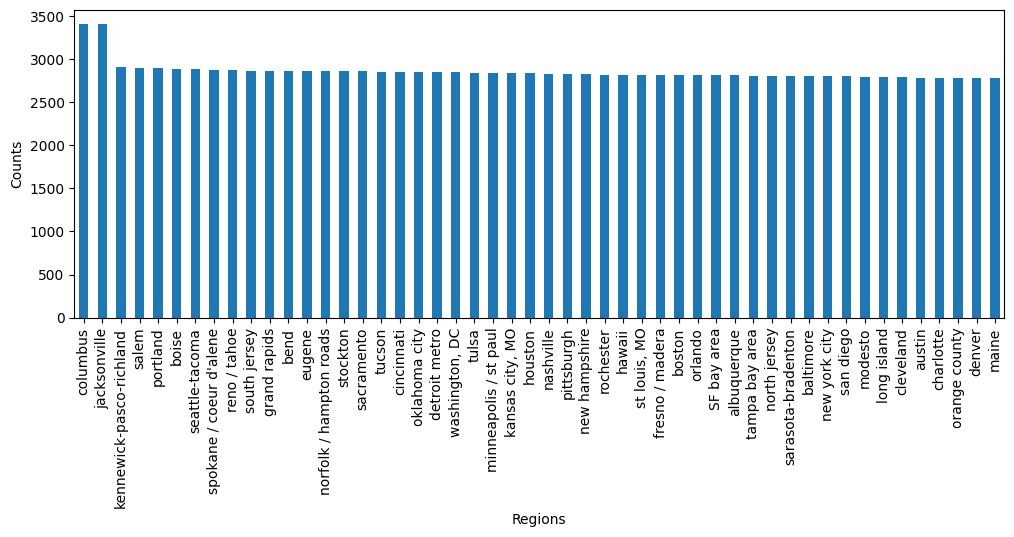

In [20]:
df_cars.region.value_counts().nlargest(50).plot(
    kind="bar", 
    figsize=(12,4),
    ylabel="Counts",
    xlabel="Regions"
)

<Axes: xlabel='year', ylabel='Counts'>

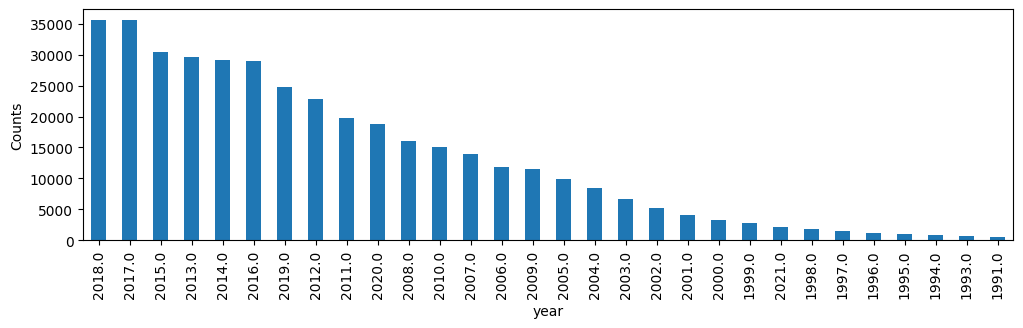

In [21]:
df_cars.year.value_counts().nlargest(30).plot(
    kind="bar", 
    figsize=(12,3),
    xlabel="year",
    ylabel="Counts"
)

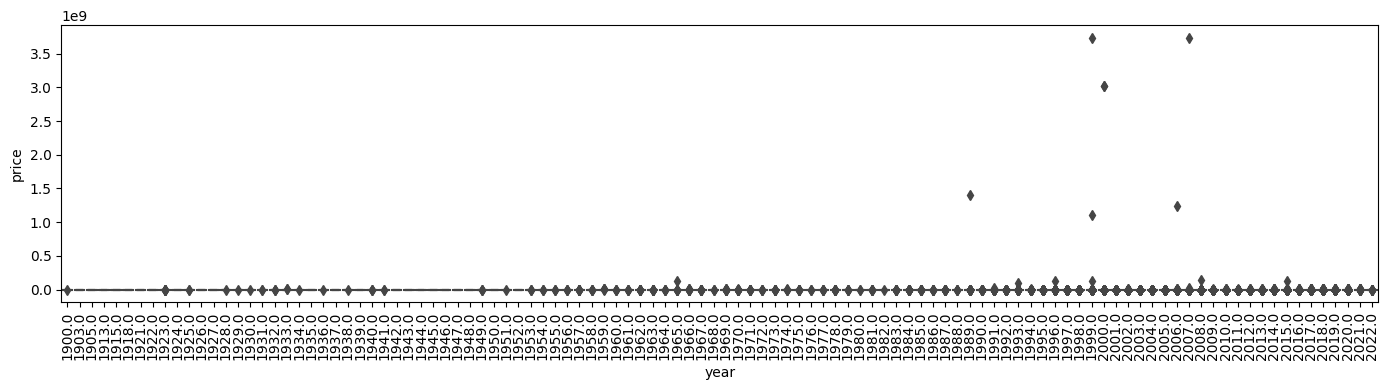

In [22]:
f,ax=plt.subplots(1,1,figsize=(14,4))
sns.boxplot(df_cars, x="year", y="price")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
f.tight_layout()

<Axes: xlabel='Manufacturer', ylabel='Counts'>

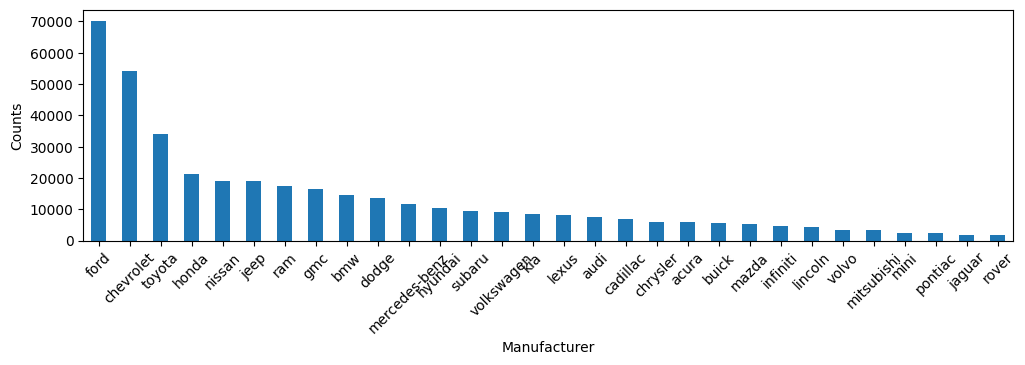

In [23]:
df_cars.manufacturer.value_counts().nlargest(30).plot(
    kind="bar", 
    figsize=(12,3),
    xlabel="Manufacturer",
    ylabel="Counts",
    rot=45
)

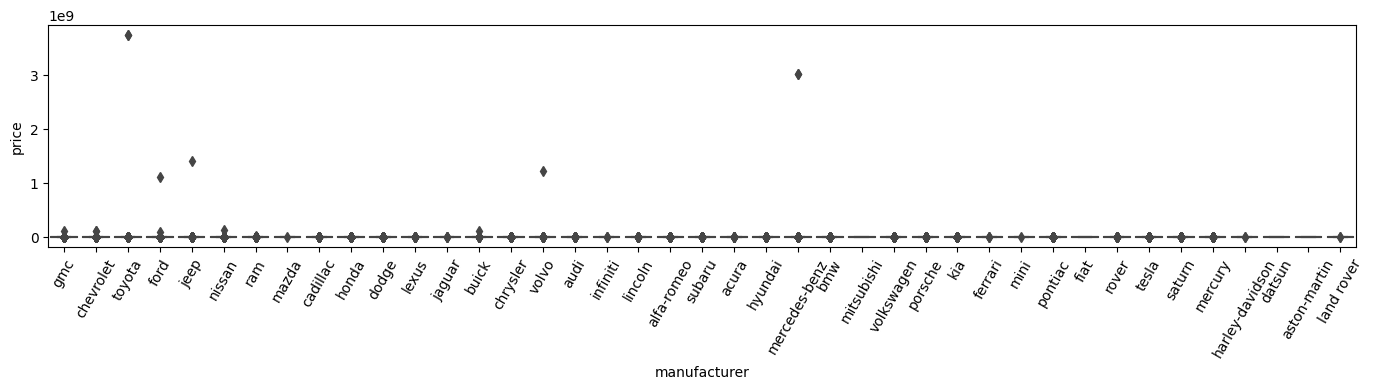

In [24]:
f,ax=plt.subplots(1,1,figsize=(14,4))
sns.boxplot(df_cars, x="manufacturer", y="price")
ax.set_xticklabels(ax.get_xticklabels(), rotation=60);
f.tight_layout()

<Axes: xlabel='condition', ylabel='price'>

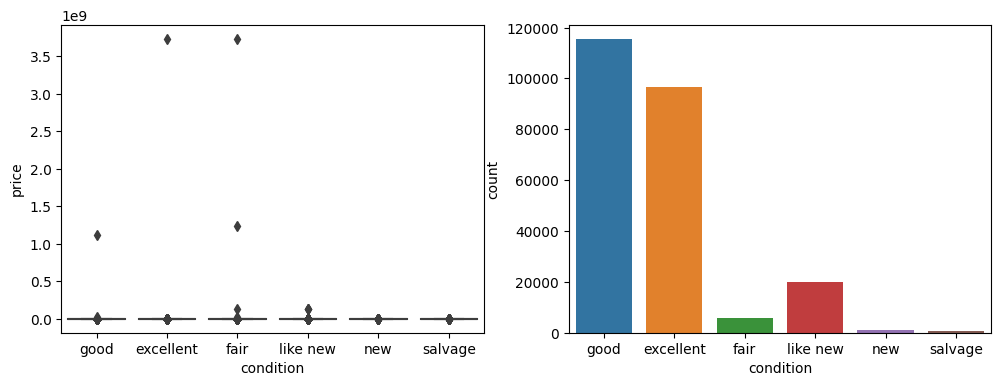

In [25]:
f, ax = plt.subplots(1,2,figsize=(12,4))
sns.countplot(df_cars, x="condition", ax=ax[1])
sns.boxplot(df_cars, x="condition", y="price", ax=ax[0])

<Axes: xlabel='fuel', ylabel='count'>

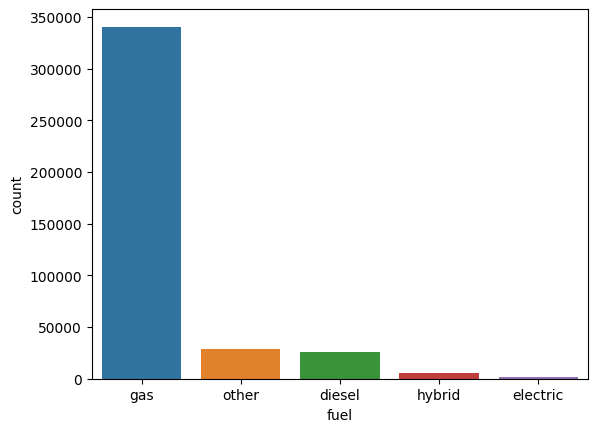

In [26]:
sns.countplot(df_cars, x="fuel")

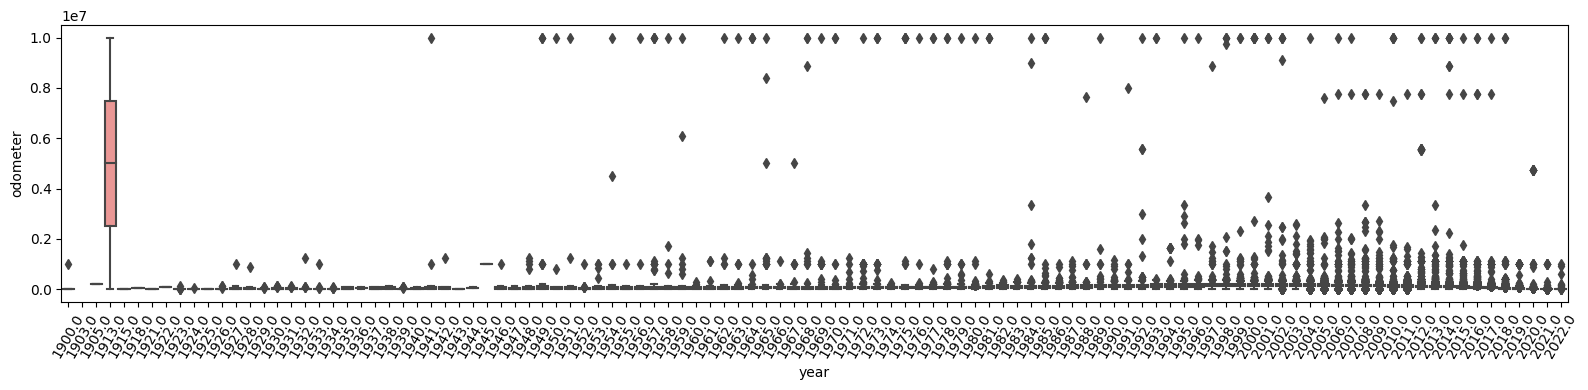

In [27]:
f, ax = plt.subplots(1,1,figsize=(16,4))
sns.boxplot(df_cars, x="year", y="odometer", ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60);
f.tight_layout()

In [28]:
df_cars.isna().sum()[df_cars.isna().sum()>0]

year                 6
condition       164348
cylinders       166951
fuel              2553
odometer          4137
title_status      7718
transmission      2271
VIN             147562
drive           120920
type             84072
paint_color     121223
description          2
lat               6155
long              6155
dtype: int64

In [29]:
df_cars.isna().sum()[df_cars.isna().sum()>0] / len(df_cars)

year            0.000015
condition       0.406776
cylinders       0.413218
fuel            0.006319
odometer        0.010239
title_status    0.019103
transmission    0.005621
VIN             0.365229
drive           0.299288
type            0.208086
paint_color     0.300038
description     0.000005
lat             0.015234
long            0.015234
dtype: float64

In [14]:
df_cars.dropna(subset=["year", 
                       "cylinders",
                       "odometer", 
                       "fuel",
                       "title_status", 
                       "transmission", 
                       "drive", 
                       "type", 
                       "description", 
                       "lat", 
                       "long", 
]).shape, df_cars.shape

((175083, 22), (404026, 22))

In [15]:
df_cars.drop(columns="condition", inplace=True)

with the same thinking of size, we will drop this column, as it has lots of missing values and does not associate with the other data sources

In [16]:
df_cars.drop(columns="paint_color", inplace=True)

same with color

Finally we will remove all nans except for the VIN column, as that is an external key, so for our purposes it does not matter if the value exists or not

with this we retain a significant amount of data.

In [33]:
df_cars.year.isna().sum()

6

In [34]:
df_cars.isna().sum()[df_cars.isna().sum()>0] / len(df_cars)

year            0.000015
cylinders       0.413218
fuel            0.006319
odometer        0.010239
title_status    0.019103
transmission    0.005621
VIN             0.365229
drive           0.299288
type            0.208086
description     0.000005
lat             0.015234
long            0.015234
dtype: float64

In [17]:
df_cars.dropna(subset=["fuel", 
                       "odometer", 
                       "title_status", 
                       "transmission", 
                       "drive", "type", 
                       "description", "lat", 
                       "long", 
                       "cylinders", "year"]).shape, df_cars.shape

((175083, 20), (404026, 20))

In [18]:
df_cars = df_cars.dropna(subset=["fuel", 
                       "odometer", 
                       "title_status", 
                       "transmission", 
                       "drive", "type", 
                       "description", "lat", 
                       "long", 
                       "cylinders", "year"])

## Need to check every model of each manufacturer, to set a uniformization

In [19]:
df_cars.columns

Index(['id', 'region', 'region_url', 'price', 'year', 'manufacturer', 'model',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'type', 'description', 'state', 'lat', 'long', 'posting_date'],
      dtype='object')

In [20]:
df_cars.manufacturer = df_cars.manufacturer.apply(filter_manufacturers)

In [21]:
df_cars.manufacturer.unique()

array(['ford', 'gmc', 'chevrolet', 'toyota', 'jeep', 'nissan', 'honda',
       'dodge', 'chrysler', 'am-general', 'mercedes-benz', 'infiniti',
       'bmw', 'volkswagen', 'mazda', 'porsche', 'lexus', 'buick',
       'hyundai', 'cadillac', 'volvo', 'kia', 'ferrari', 'pontiac',
       'audi', 'mitsubishi', 'acura', 'lincoln', 'fiat', 'land-rover',
       'jaguar', 'mini', 'saturn', 'alfa-romeo', 'subaru', 'tesla',
       'harley-davidson', 'mercury', 'datsun', 'aston-martin'],
      dtype=object)

In [22]:
df_cars.model = list(map(
    lambda make, model: 
    get_parse_from_model_str(make).parse_model(model).get_model(), 
    df_cars.manufacturer, 
    df_cars.model
))

In [23]:
df_cars.isna().sum()

id                  0
region              0
region_url          0
price               0
year                0
manufacturer        0
model           12773
cylinders           0
fuel                0
odometer            0
title_status        0
transmission        0
VIN             69162
drive               0
type                0
description         0
state               0
lat                 0
long                0
posting_date        0
dtype: int64

In [24]:
df_cars.dropna(subset = ["model"], inplace=True)

Save the processed data

In [25]:
fuel_map = {
    "gas":"gas",
    "diesel":"diesel",
    "hybrid":"gas",
    "other":"gas",
    "electric":"electric",
    "eletric":"electric"
}

In [27]:
df_cars.fuel = df_cars.fuel.map(fuel_map)

In [28]:
df_cars.isna().sum()   

id                  0
region              0
region_url          0
price               0
year                0
manufacturer        0
model               0
cylinders           0
fuel                0
odometer            0
title_status        0
transmission        0
VIN             64744
drive               0
type                0
description         0
state               0
lat                 0
long                0
posting_date        0
dtype: int64

In [35]:
df_cars.cylinders.unique()

array(['6 cylinders', '8 cylinders', '4 cylinders', '5 cylinders',
       '10 cylinders', '3 cylinders', 'other', '12 cylinders'],
      dtype=object)

In [36]:
def map_cylinders(cyl):
    if "other" in cyl:
        return "Unknown"
    
    cyls = list(map(str, range(0, 16+1)))
    for c in cyls:
        if c in cyl:
            return c
    return "Unknown"

In [38]:
df_cars.cylinders = df_cars.cylinders.apply(map_cylinders)

In [43]:
(df_cars.year==0).any()

False

In [39]:
df_cars.to_csv(f"{PROC_PATH}/vehicles.csv")

In [45]:
df_cars.shape

(157431, 20)

In [46]:
df_cars.columns

Index(['id', 'region', 'region_url', 'price', 'year', 'manufacturer', 'model',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'type', 'description', 'state', 'lat', 'long', 'posting_date'],
      dtype='object')